### Feature selection is also known as Variable selection or Attribute selection.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
np.set_printoptions(suppress=True)
pt = np.get_printoptions()['threshold']
from sklearn import datasets
from sklearn.feature_selection import VarianceThreshold

### Load Data

In [ ]:
dataframe = pd.read_csv('data/pokemon.csv')
dataframe.nunique()

In [ ]:
pokemon_features = dataframe.iloc[:,4:12]
pokemon_classes = dataframe['Legendary']
pokemon_X = np.array(pokemon_features)
pokemon_y = np.array(pokemon_classes).T
print('Feature set shape:', pokemon_X.shape)
print('Response class shape:', pokemon_y.shape)

In [ ]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(threshold=.15)
vt.fit(pokemon_X, pokemon_y)


feature_scores = [(item, score) for item, score in zip(pokemon_features, vt.variances_)]
sorted(feature_scores, key=lambda x: -x[1])[:10]

### Verifying the scores

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(pokemon_X, pokemon_y)


# In[18]:

importance_scores = rfc.feature_importances_
feature_importances = [(feature, score) for feature, score in zip(pokemon_features, importance_scores)]
sorted(feature_importances, key=lambda x: -x[1])[:10]

As seen from the variance scores Total, Sp. Atk, Attack, Defence are the top four features which decides a pokemon's ability to be legendary.

### Feature Correlation Analysis

In [ ]:
corr_matrix = dataframe.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))

#Priniting the highly correlated pairs
print(sol)

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(corr_matrix, annot=True, linewidths=.5, fmt= '.1f',ax=ax)


As we can see Defense-Sp. Def  , Sp. Atk-Sp. Def , Total-Legendary  are moderately correlated

# Filter Methods 

Filter methods are generally used as a preprocessing step. The selection of features is independent of any machine learning algorithms. Instead, features are selected on the basis of their scores in various statistical tests for their correlation with the outcome variable. The correlation is a subjective term here. For basic guidance, you can refer to the following table for defining correlation co-efficients.





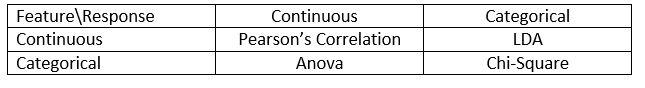

<b>Pearson’s Correlation:</b> It is used as a measure for quantifying linear dependence between two continuous variables X and Y. Its value varies from -1 to +1. Pearson’s correlation is given as:


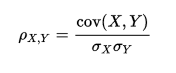


<b>LDA:</b> Linear discriminant analysis is used to find a linear combination of features that characterizes or separates two or more classes (or levels) of a categorical variable.

<b>ANOVA:</b> ANOVA stands for Analysis of variance. It is similar to LDA except for the fact that it is operated using one or more categorical independent features and one continuous dependent feature. It provides a statistical test of whether the means of several groups are equal or not.

<b>Chi-Square:</b> It is a is a statistical test applied to the groups of categorical features to evaluate the likelihood of correlation or association between them using their frequency distribution.
One thing that should be kept in mind is that filter methods do not remove multicollinearity. So, you must deal with multicollinearity of features as well before training models for your data.

# Variable Types

<h3>Categorical variable</h3>

Categorical variables contain a finite number of categories or distinct groups. Categorical data might not have a logical order. For example, categorical predictors include gender, material type, and payment method.

<h3>Continuous variable</h3>

Continuous variables are numeric variables that have an infinite number of values between any two values. A continuous variable can be numeric or date/time. For example, the length of a part or the date and time a payment is received.


#### Identifying the categorical variables in the data

In [ ]:
likely_cat = [var for var in dataframe.columns if 
dataframe[var].nunique()/dataframe[var].count() < 0.05] # can take some other threshold

print("The categorical variables are: "+str(likely_cat))


#### Identifying the continuous variables in the data

In [ ]:
likely_cont = [var for var in dataframe.columns if 
dataframe[var].nunique()/dataframe[var].count() > 0.05] # can take some other threshold

print("The continuous variables are: "+str(likely_cont))

# One Hot Encoding

Machine learning algorithms cannot work with categorical data directly. Categorical data must be converted to numbers. This applies when you are working with a sequence classification type problem and plan on using deep learning methods such as Long Short-Term Memory recurrent neural networks.

A one hot encoding is a representation of categorical variables as binary vectors. <br>
This first requires that the categorical values be <b>mapped to integer values</b>.
Then, each integer value is represented as a binary vector that is all <b>zero</b> values <b>except the index of the integer</b>, which is marked with a 1.

Lets perform a one hot encoding on our categorical data

In [ ]:
dataframe

In [ ]:
pd.get_dummies(dataframe,prefix=likely_cat,columns = likely_cat) #use the get_dummies() from pandas for one hot encoding

<h1>Recursive Feature Elimination</h1>

The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain.

It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.



The example below uses RFE with the logistic regression algorithm to select the top 3 features. The choice of algorithm does not matter too much as long as it is skillful and consistent.

In [ ]:
# feature extraction
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(pokemon_X, pokemon_y)
selected_features = [val for idx,val in enumerate(pokemon_features.columns) if fit.support_[idx]]
print("Num Features: "+ str(fit.n_features_))  
print("Selected Features: "+ str(selected_features)) 
print("All Features: "+ str(list(pokemon_features.columns)))
print("Feature Ranking: " + str(fit.ranking_))  
